MNIST 데이터셋을 가져와줍니다.

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

"data" 속성에는 이미지 데이터, "target" 속성에는 레이블 데이터가 들어있습니다.


In [3]:
X, y = mnist["data"], mnist["target"]

첫째 손글씨 이미지를 확인하면 5로 보이는 이미지가 보입니다.

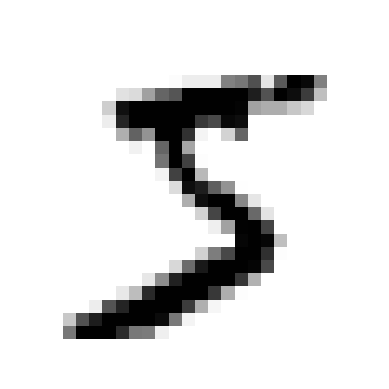

In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl

some_digit = X[0]

# reshape() 함수를 이용하여 28x28 모양의 2차원 어레이로 변환
some_digit_image = some_digit.reshape(28, 28)

# 흑백 이미지로 보여주기
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

plt.show()

숫자 이미지 출력 함수입니다.


In [5]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

처음 60,000개의 샘플은 훈련 세트, 이후 10,000개의 샘플은 테스트 세트입니다.

In [6]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

기본 훈련세트를 이용한 KNN 분류기의 성능 평가 진행

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=4)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [8]:
y_knn_pred = knn_clf.predict(X_test)

accuracy_score() 함수를 이용한 정확도는 97.14% 입니다.

In [9]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_knn_pred)

0.9714

MNIST 데이터셋의 주어진 이미지를 원하는 방향(왼쪽, 오른쪽, 위, 아래)으로 1픽셀만큼 이동시킬 수 있는 함수를 구현하겠습니다.

<ipython-input-10-b82cd03dd2fe>:1: DeprecationWarning: Please use `shift` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  from scipy.ndimage.interpolation import shift


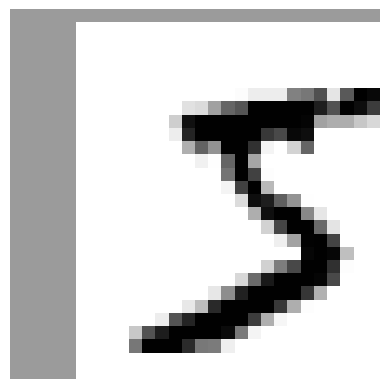

In [10]:
from scipy.ndimage.interpolation import shift

def shift_digit(digit_array, dx, dy, new=0):
    return shift(digit_array.reshape(28, 28), [dy, dx], cval=new).reshape(784)

plot_digit(shift_digit(some_digit, 5, 1, new=100))

6만 개의 훈련 샘플 각가에 대해 상하좌우 1픽셀씩 이동시킨 훈련 데이터를 총 24만개 생성합니다. 따라서 최종 훈련 세트의 크기는 30만이 됩니다.

In [11]:
import numpy as np

X_train_expanded = [X_train]
y_train_expanded = [y_train]
for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    shifted_images = np.apply_along_axis(shift_digit, axis=1, arr=X_train, dx=dx, dy=dy)
    X_train_expanded.append(shifted_images)
    y_train_expanded.append(y_train)

X_train_expanded = np.concatenate(X_train_expanded)
y_train_expanded = np.concatenate(y_train_expanded)
X_train_expanded.shape, y_train_expanded.shape

((300000, 784), (300000,))

확장된 훈련 세트를 이용하여 다시 학습하면 정확도가 97.63%까지 상승합니다.

In [12]:
knn_clf.fit(X_train_expanded, y_train_expanded)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [13]:
y_knn_expanded_pred = knn_clf.predict(X_test)

In [14]:
accuracy_score(y_test, y_knn_expanded_pred)

0.9763